<a href="https://colab.research.google.com/github/kianfa/RL---Reinforcement-Learning/blob/python-codes/Grid_world_%2B_Policy_Iteration_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

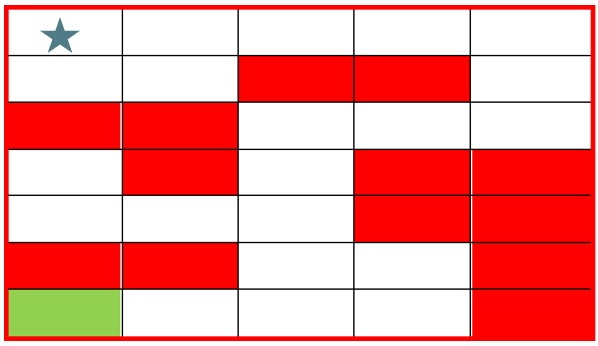


red parts are obstacle, and the agent wants to move from (0,0) to target(green house)



In [663]:
import numpy as np
import pandas as pd

In [664]:
class Agent:
    pass

agent = Agent()

# Defining size of Grid World, obstancles cordination, and rewards

In [665]:
observation_space = [7,5]
obstacles_list = [(1,2),(1,3),(2,0), (2,1), (3,1) , (3,3) , (3,4) , (4,3), (4,4), (5,0) , (5,1) , (5,4), (6,4)  ]
Target_address = (6,0)
hit_reward = -10
target_reward = 10
extra_move_reward = 0

# Environment

In [666]:
class Environment:
    def __init__(self, observation_space, obstacles_list , Target_address):
        self.observation_space = observation_space

        self.action_space = ['up' , 'down' , 'left' , 'right' ]
        self.n_actions = len(self.action_space)

        self.Grid_world = np.ones((self.observation_space[0] , self.observation_space[1]))
        for i in obstacles_list :
            self.Grid_world[i] = 0
        self.Grid_world[Target_address] = 10

        self.done = False
        self.Reward = 0

    def reset(self):
        #RESET STATES AND EVERYTHING

        agent.address = (0,0)
        self.values = 0*np.ones((self.observation_space[0], self.observation_space[1])) # ((rows,cols))
        for X in obstacles_list:
             self.values[X] = -np.inf
        return self.values

    def step(self, action, row,col):
        agent.address = (row,col)
        self.Reward = 0
        match action:
            case 'down' :
                try:
                    agent.address = (agent.address[0]+1 , agent.address[1])
                    if agent.address in obstacles_list or  agent.address[0]< 0 or agent.address[1]< 0 or agent.address[0] >= env.observation_space[0] or agent.address[1] >= env.observation_space[1] :
                        agent.address = (agent.address[0]-1 , agent.address[1])
                        self.Reward = hit_reward
                    elif agent.address == Target_address:
                        self.Reward = target_reward
                    else:
                        self.Reward = extra_move_reward

                except:
                    print("error")
                    pass


            case 'up' :
                try:
                    agent.address = (agent.address[0]-1 , agent.address[1])
                    if agent.address in obstacles_list or  agent.address[0]< 0 or agent.address[1]< 0 or agent.address[0] >= env.observation_space[0] or agent.address[1] >= env.observation_space[1]:
                        agent.address = (agent.address[0]+1 , agent.address[1])
                        self.Reward = hit_reward
                    elif agent.address == Target_address:
                        self.Reward = target_reward
                    else:
                        self.Reward = extra_move_reward
                except:
                    print("error")
                    pass

            case 'right' :
                try:
                    agent.address = (agent.address[0] , agent.address[1]+1)
                    if agent.address in obstacles_list or  agent.address[0]< 0 or agent.address[1]< 0 or agent.address[0] >= env.observation_space[0] or agent.address[1] >= env.observation_space[1]:

                        agent.address = (agent.address[0] , agent.address[1]-1)
                        self.Reward = hit_reward

                    elif agent.address == Target_address:
                        self.Reward = target_reward
                    else:
                        self.Reward = extra_move_reward
                except:

                    print("error")
                    pass


            case 'left' :
                try:
                    agent.address = (agent.address[0] , agent.address[1]-1)
                    if agent.address in obstacles_list or  agent.address[0]< 0 or agent.address[1]< 0 or agent.address[0] >= env.observation_space[0] or agent.address[1] >= env.observation_space[1] :
                        agent.address = (agent.address[0] , agent.address[1]+1)
                        self.Reward = hit_reward

                    elif agent.address == Target_address:
                        self.Reward = target_reward
                    else:
                        self.Reward = extra_move_reward
                except:
                    print("error")
                    pass


        if agent.address == Target_address:
            self.Reward = target_reward

        return self.Reward, agent.address

In [667]:
env = Environment(observation_space, obstacles_list, Target_address)
initial_values = env.reset()
print(initial_values)

[[  0.   0.   0.   0.   0.]
 [  0.   0. -inf -inf   0.]
 [-inf -inf   0.   0.   0.]
 [  0. -inf   0. -inf -inf]
 [  0.   0.   0. -inf -inf]
 [-inf -inf   0.   0. -inf]
 [  0.   0.   0.   0. -inf]]


# Value function
value of obstacles are defined as -inf (not neccessary, but it would help user to understand the effectiveness of the algorithm)

In [668]:
print(initial_values)

[[  0.   0.   0.   0.   0.]
 [  0.   0. -inf -inf   0.]
 [-inf -inf   0.   0.   0.]
 [  0. -inf   0. -inf -inf]
 [  0.   0.   0. -inf -inf]
 [-inf -inf   0.   0. -inf]
 [  0.   0.   0.   0. -inf]]


# Policy evaluation(one step)

In [669]:
def policy_evaluation(values, policy ,gamma):


        for row in range(env.observation_space[0]):
            for col in range(env.observation_space[1]):
                if (row,col) not in obstacles_list:
            # Calculate the value of V(s)
                    if (row,col) == Target_address:
                        values[row,col] = 0
                        continue
                    sum = 0
                    for act in ['up' , 'down' , 'left' , 'right' ]:
                        reward , agent.address = env.step(act, row,col)
                        # print(str((row,col)) ,act ,str(reward) , str(agent.address) )
                        sum = sum + policy*(reward + gamma*values[agent.address[0],agent.address[1]])


                    values[row,col] = sum

        ## Policy???
        return values

In [670]:
from numpy import linalg as LA

# Policy evaluation

In [671]:
V  =  initial_values
for k in range(1,420):
    v = V;
    V = policy_evaluation(values = initial_values, policy = 0.25 ,gamma = 0.99);
    print('k = ' + str(k)) ;
    # theta=0.0001
    # if LA.norm(V-v) < theta:
    #    break ;


k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
k = 20
k = 21
k = 22
k = 23
k = 24
k = 25
k = 26
k = 27
k = 28
k = 29
k = 30
k = 31
k = 32
k = 33
k = 34
k = 35
k = 36
k = 37
k = 38
k = 39
k = 40
k = 41
k = 42
k = 43
k = 44
k = 45
k = 46
k = 47
k = 48
k = 49
k = 50
k = 51
k = 52
k = 53
k = 54
k = 55
k = 56
k = 57
k = 58
k = 59
k = 60
k = 61
k = 62
k = 63
k = 64
k = 65
k = 66
k = 67
k = 68
k = 69
k = 70
k = 71
k = 72
k = 73
k = 74
k = 75
k = 76
k = 77
k = 78
k = 79
k = 80
k = 81
k = 82
k = 83
k = 84
k = 85
k = 86
k = 87
k = 88
k = 89
k = 90
k = 91
k = 92
k = 93
k = 94
k = 95
k = 96
k = 97
k = 98
k = 99
k = 100
k = 101
k = 102
k = 103
k = 104
k = 105
k = 106
k = 107
k = 108
k = 109
k = 110
k = 111
k = 112
k = 113
k = 114
k = 115
k = 116
k = 117
k = 118
k = 119
k = 120
k = 121
k = 122
k = 123
k = 124
k = 125
k = 126
k = 127
k = 128
k = 129
k = 130
k = 131
k = 132
k = 133
k = 134
k = 135
k = 136
k = 137
k = 138
k = 

In [672]:

df = pd.DataFrame(V)
df

,0,1,2,3,4
0,-434.436364,-430.530100,-430.027613,-426.720940,-420.475251
1,-435.726552,-434.444522,-inf,-inf,-411.036778
2,-inf,-inf,-358.981485,-380.899816,-398.022577
3,-363.158999,-inf,-331.384332,-inf,-inf
4,-347.543731,-325.779268,-296.985810,-inf,-inf
5,-inf,-inf,-235.697982,-228.634201,-inf
6,0.000000,-93.608884,-180.902500,-210.612573,-inf
